In [16]:
pip install autograd

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import autograd.numpy as np
from autograd import grad

In [2]:
def lqr_controller(x,xd,A, B, Q, R):
    N=100
    P = [None] * (N + 1)
    K = [None] * N
    u = [None] * N
    
    P[N]=Q
    P[N-1] = Q + A.T @ Q @ A - (A.T @Q @ B) @ np.linalg.pinv(R + B.T @ Q @ B) @ (B.T @ Q @ A)
    e=x-xd

    K[N-1]= np.linalg.pinv(R + B.T @ P[N] @ B) @ B.T @ P[N] @ A
    u[N-1] = -np.array(K[N-1] @ e)
    u_star = u[N-1]
    return u_star

In [3]:
def plot(traj):
    x=[]
    y=[]
    theta=[]
    for tr in traj:
        x.append(tr[0])
        y.append(tr[1])
        theta.append(tr[2])
    return x,y,theta

# LQR on straight line

In [4]:
n=100
x_r = np.arange(0,100,1)
y_r = 1
theta_r = np.zeros(n)
vr = 1
phi_r=np.zeros(n)
dt=1

In [5]:
A = np.array([[1.0,  0, 0],
                  [0, 1.0, 0],
                  [0,  0, 1.0]])
Q = 10000*np.identity(3)
R = 140000*np.identity(2)

initial_pos=[0, -.5, 0.1]
real_traj=[]
for i in range(len(x_r)):
    real_traj.append(initial_pos)
    B=np.array([[np.cos(initial_pos[2])*dt, 0],[np.sin(initial_pos[2])*dt, 0],[0, dt]])
    u=lqr_controller(np.array(initial_pos),np.array([x_r[i],y_r,theta_r[i]]), A, B, Q, R)
    # print(u)
    u=np.array(u)+np.array([vr,phi_r[i]])
    
    initial_pos=(A @ initial_pos) + (B @ u)

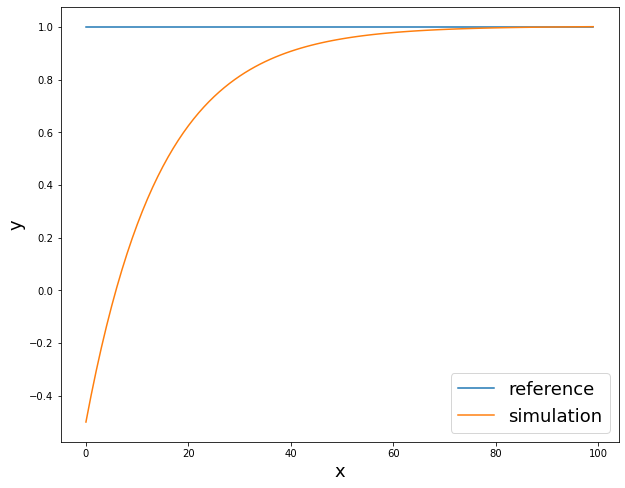

In [6]:
plt.figure(figsize=(10, 8))

x,y,theta=plot(real_traj)
# plt.plot(,label='reference')
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.plot(np.arange(0,100,1),np.ones(100),label='reference')
plt.plot(x,y,label='simulation')
plt.legend(prop={'size': 18})

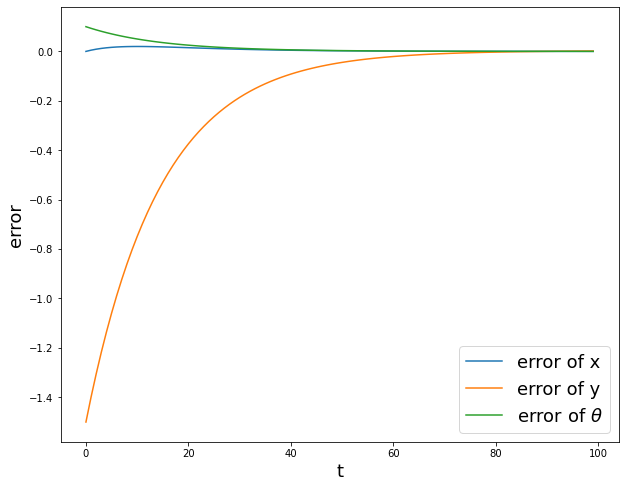

In [7]:
plt.figure(figsize=(10, 8))
plt.plot(np.arange(0,100,1),np.array(x)-np.array(x_r),label='error of x')
plt.plot(np.arange(0,100,1),np.array(y)-np.array(y_r),label='error of y')
plt.plot(np.arange(0,100,1),np.array(theta)-np.array(theta_r),label=r'error of $\theta$')
plt.xlabel('t',fontsize=18)
plt.ylabel('error',fontsize=18)
plt.legend(prop={'size': 18})

# LQR on Arbitrary line

In [8]:
def traj(xr):
    yr = 0.5 * np.sin(xr)
    return yr

def theta(xr):
    grad_fct = grad(traj)
    theta_r=[]
    for i in xr:
        theta_r.append(np.arctan(grad_fct(i)))
    return theta_r

def phi(xr):
    vr=0.1
    l=0.05
    grad_fct = grad(traj)
    phi_r=[]
    for i in xr:
        theta_r=np.arctan(grad_fct(i))
        phi_r.append((np.arctan(grad_fct(i+0.1))-np.arctan(grad_fct(i)))*l/(vr/np.cos(theta_r)))
    return phi_r

In [9]:
x_r=np.arange(0,200,0.1)
y_r=traj(x_r)
theta_r=theta(x_r)
phi_r=phi(x_r)
dt=1
vr=0.1

In [10]:

A = np.array([[1.0,  0, 0],
                  [0, 1.0, 0],
                  [0,  0, 1.0]])
Q = 5*np.identity(3)
R = 20*np.identity(2)

initial_pos=[0, -.5, 0.1]
real_traj=[]
for i in range(len(x_r)):
    real_traj.append(initial_pos)
    B=np.array([[np.cos(theta_r[i])*dt, 0],[np.sin(theta_r[i])*dt, 0],[0, dt]])
    u=lqr_controller(np.array(initial_pos),np.array([x_r[i],y_r[i],theta_r[i]]), A, B, Q, R)
    # print(u)
    u=np.array(u)+np.array([vr,phi_r[i]])
    
    initial_pos=(A @ initial_pos) + (B @ u)

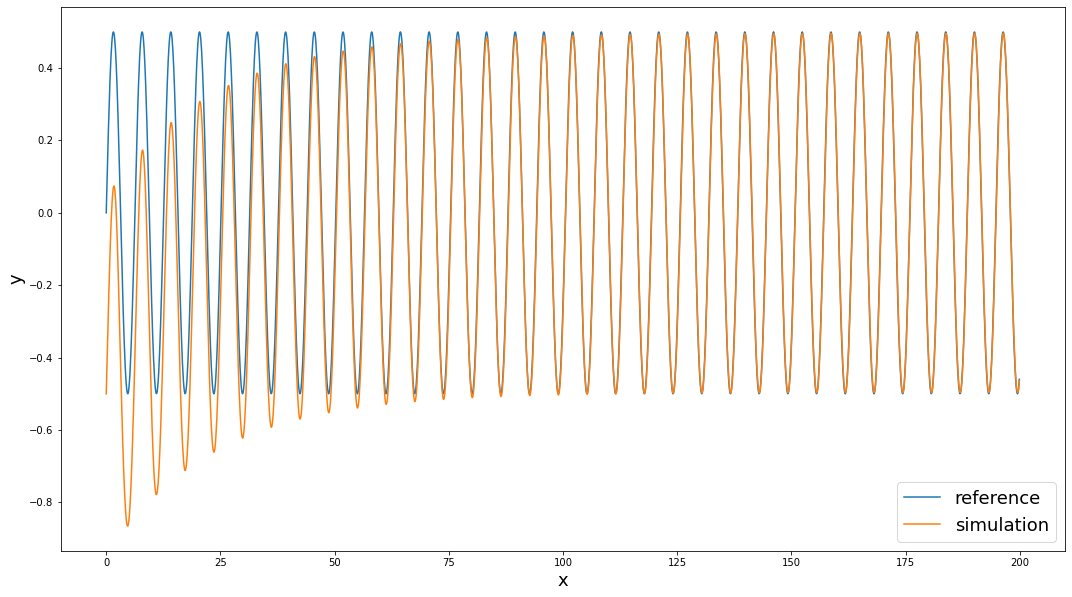

In [11]:
plt.figure(figsize=(18, 10))
x,y,theta=plot(real_traj)
# plt.plot(,label='reference')
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.plot(x,0.5*np.sin(x),label='reference')
plt.plot(x,y,label='simulation')
plt.legend(prop={'size': 18})

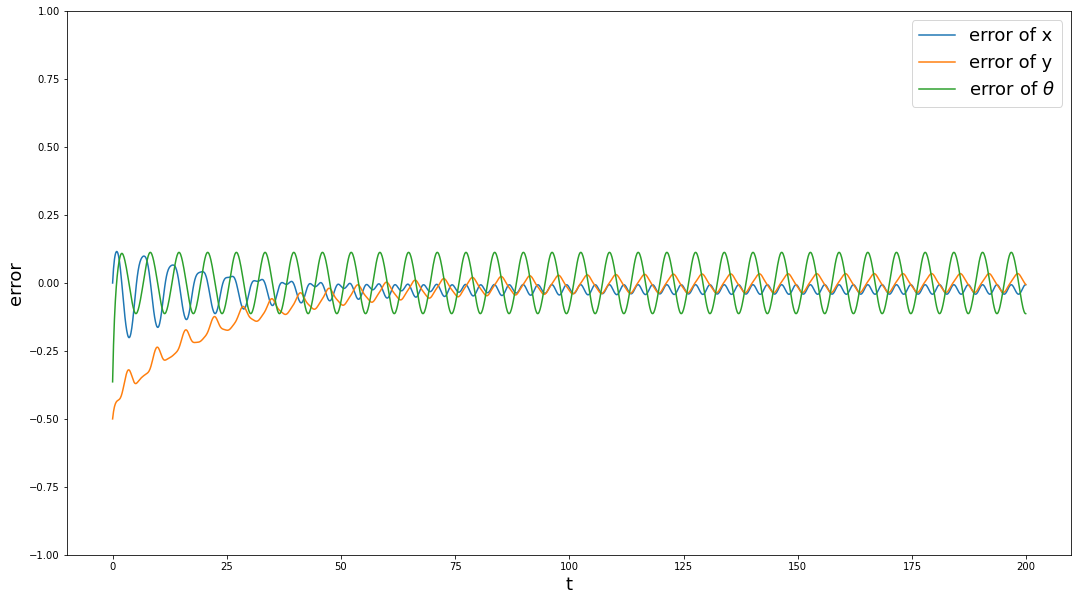

In [12]:
plt.figure(figsize=(18, 10))
plt.plot(np.arange(0,200,0.1),np.array(x)-np.array(x_r),label='error of x')
plt.plot(np.arange(0,200,0.1),np.array(y)-np.array(y_r),label='error of y')
plt.plot(np.arange(0,200,0.1),np.array(theta)-np.array(theta_r),label=r'error of $\theta$')
plt.xlabel('t',fontsize=18)
plt.ylabel('error',fontsize=18)
plt.ylim([-1,1])
plt.legend(prop={'size': 18})

# Execution time

In [14]:
def traj(xr):
    yr = 0.5 * np.sin(xr)
    return yr

def theta(xr):
    grad_fct = grad(traj)
    theta_r=[]
    for i in xr:
        theta_r.append(np.arctan(grad_fct(i)))
    return theta_r

def phi(xr):
    vr=0.1
    l=0.05
    grad_fct = grad(traj)
    phi_r=[]
    for i in xr:
        theta_r=np.arctan(grad_fct(i))
        phi_r.append((np.arctan(grad_fct(i+0.1))-np.arctan(grad_fct(i)))*l/(vr/np.cos(theta_r)))
    return phi_r
x_r=np.arange(0,100,0.1)
y_r=traj(x_r)
theta_r=theta(x_r)
phi_r=phi(x_r)
dt=1
vr=0.1

In [15]:
import time
start_time = time.time()
A = np.array([[1.0,  0, 0],
                  [0, 1.0, 0],
                  [0,  0, 1.0]])
Q = 5*np.identity(3)
R = 20*np.identity(2)

initial_pos=[0, -.5, 0.1]
real_traj=[]
for i in range(len(x_r)):
    real_traj.append(initial_pos)
    B=np.array([[np.cos(theta_r[i])*dt, 0],[np.sin(theta_r[i])*dt, 0],[0, dt]])
    u=lqr_controller(np.array(initial_pos),np.array([x_r[i],y_r[i],theta_r[i]]), A, B, Q, R)
    # print(u)
    u=np.array(u)+np.array([vr,phi_r[i]])
    
    initial_pos=(A @ initial_pos) + (B @ u)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.20711803436279297 seconds ---
